In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

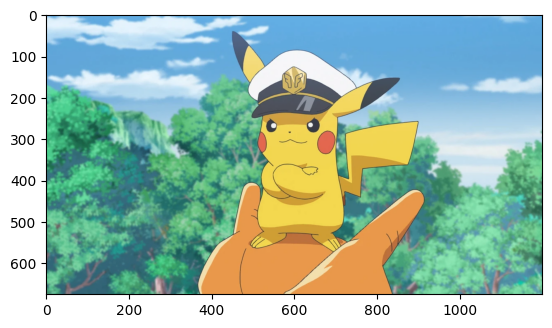

In [69]:
img = cv2.imread("Photos/pikachu2ComBackground.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


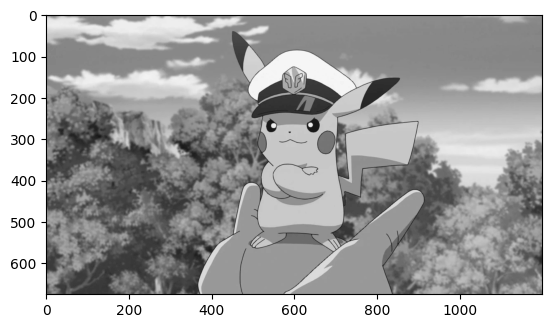

In [70]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#gray = cv2.equalizeHist(gray)
plt.imshow(gray, cmap='gray')

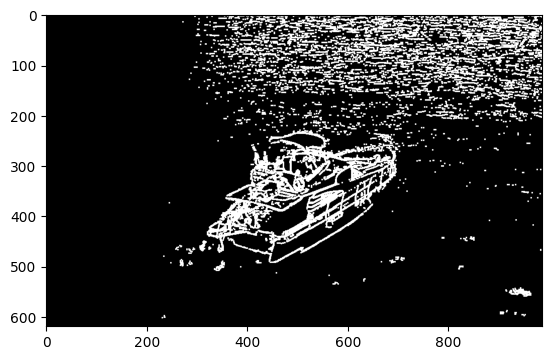

In [67]:
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY+cv2.THRESH_BINARY_INV,13,7)
#thresh = cv2.Canny(gray, 200, 200)
#kernel = np.ones((3,3),np.uint8)
#theshDilated = cv2.dilate(thresh, kernel)
plt.imshow(thresh, cmap="gray")


(619, 987)
950


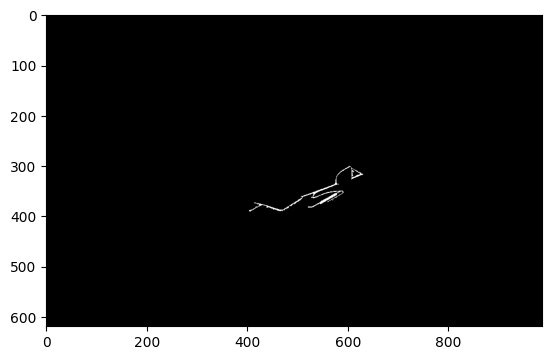

In [68]:
cnts, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cnts = sorted(cnts, key=cv2.contourArea)[-1]
print(img.shape[:2])
print(len(cnts))
mask = np.zeros(img.shape[:2], dtype="uint8")
maskredRed = cv2.drawContours(mask,cnts, -1, (0,0,255), -1)
maskedFinal = cv2.drawContours(mask,[cnts], -1, (255,255,255), -1)


plt.imshow(maskedFinal, cmap="gray")

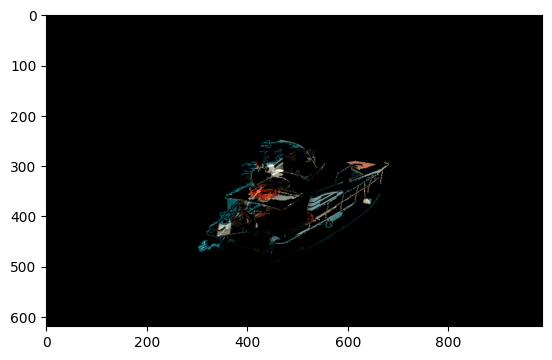

In [48]:
final = cv2.bitwise_and(img, img, mask=maskredRed)
plt.imshow(final)